전처리 단계

In [2]:
'''
머신러닝은 -> 지도학습, 비지도학습으로 나뉜다.

지도학습 : 입력 데이터와 정답을 알려주고 그 사이의 패턴을 찾도록 학습 -> 예측과 분류에 사용
    - 회귀 : 연속적인 숫자 -> 예측에 사용
    - 분류 : 미리의 정의된 범주 -> 데이터 분류


비지도학습 : 입력 데이터만 주고 입력 데이터의 패턴이나 그룹을 학습 -> 데이터 이해 및 탐색

대충 EDA로 데이터 탐색해서 결측치 이상치 채우거나 버리고 시각화해서 보여줌

이후 전처리 진행

전처리는 수집 -> 정제 -> 변환 -> 통합 순으로 진행
정제 : 이상치(IQR), 결측치(na), 중복 처리(duplicated)
변환 : 로그, 루트 변환 -> 값의 범위가 클 때 사용 -> 스케일링도 있음 표준화, 정규화 데이터의 범위 맞추기
        * 수치가 아닌 텍스트 같은 범주형 데이터는 레이블 인코딩, 원-핫 인코딩으로 변환

'''
import pandas as pd

In [34]:
#1. 결측치 처리 : 삭제, 치환

# 데이터프레임 생성
data={'Name': ['Alice', 'Bob', None, 'Alice'],
 'Age': [25, None, 30, 25],
 'Score': [85, 90, None, 85]}
df = pd.DataFrame(data)
df
#print(df.isnull().sum())

,Name,Age,Score
0,Alice,25.0,85.0
1,Bob,NaN,90.0
2,None,30.0,NaN
3,Alice,25.0,85.0


In [38]:
drop_df = df.drop_duplicates()
drop_df

,Name,Age,Score
0,Alice,25.0,85.0
1,Bob,NaN,90.0
2,None,30.0,NaN


In [35]:
#결측치 제거
df_miss_row = df.dropna()
df_miss_row

,Name,Age,Score
0,Alice,25.0,85.0
3,Alice,25.0,85.0


In [36]:
# 열단위 삭제
df_miss_cols = df.dropna(axis=1)
print(df_miss_cols)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [ ]:
df['Age'].drop()


In [31]:
# 결측치 대체 (fillna() <= 평균, 중간값, 최빈값값)
# 데이터프레임 생성
data={'Name': ['Alice', 'Bob', None],
 'Age': [25, None, 30],
 'Score': [85, 90, None]}
df = pd.DataFrame(data)
df

,Name,Age,Score
0,Alice,25.0,85.0
1,Bob,NaN,90.0
2,None,30.0,NaN


In [32]:
df['Name'] = df['Name'].fillna(df['Name'].mode()[0])
df['Age'] = df['Age'].fillna(25)
df['Score'] = df['Score'].fillna(df['Score'].median())
df

,Name,Age,Score
0,Alice,25.0,85.0
1,Bob,25.0,90.0
2,Alice,30.0,87.5


In [53]:
import numpy as np
import pandas as pd
# 예제 데이터
data = {'Scores': [70, 75, 80, 85, 90, 150, -50]}
df = pd.DataFrame(data)
print(df.index)

RangeIndex(start=0, stop=7, step=1)


In [48]:
# IQR
Q1 = df['Scores'].quantile(0.25) # 1사분위
Q3 = df['Scores'].quantile(0.75) # 3사분위

IQR = Q3 - Q1
print(Q1, Q3, IQR)

72.5 87.5 15.0


In [49]:
# 이상치의 범위 기준
l_bound = Q1 - 1.5 * IQR
u_bound = Q3 + 1.5 * IQR
print(l_bound, u_bound)


50.0 110.0


In [50]:
# 이상치 확인
out_range = df[(df['Scores']<l_bound) | (df['Scores'] > u_bound)]
print(out_range)

   Scores
5     150
6     -50


In [51]:
# 이상치 삭제
df = df[(df['Scores'] > l_bound) & (df['Scores']< u_bound)]
df

,Scores
0,70
1,75
2,80
3,85
4,90


In [55]:
# 결측치의 대체
df.loc[df['Scores'] < l_bound, 'Scores'] = l_bound
df.loc[df['Scores'] > u_bound, 'Scores'] = 100
df

,Scores
0,70
1,75
2,80
3,85
4,90
5,110
6,50


In [62]:
# 로그 변환 : 큰 값은 축소 작은 값은 상대적으로 커져 데이터의 분포를 평탄하게 함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 # 예제 데이터
data = pd.DataFrame({'Original': [1, 4, 16, 36, 100, 1000, 10000]})
print(data)

   Original
0         1
1         4
2        16
3        36
4       100
5      1000
6     10000


In [63]:
# 로그변환 : log(x+1)
data['Log Transformation'] = np.log1p(data['Original'])

# 스퀘어 루트 변환
data['Square Root Transformation'] = np.sqrt(data['Original'])

data

,Original,Log Transformation,Square Root Transformation
0,1,0.693147,1.000000
1,4,1.609438,2.000000
2,16,2.833213,4.000000
3,36,3.610918,6.000000
4,100,4.615121,10.000000
5,1000,6.908755,31.622777
6,10000,9.210440,100.000000


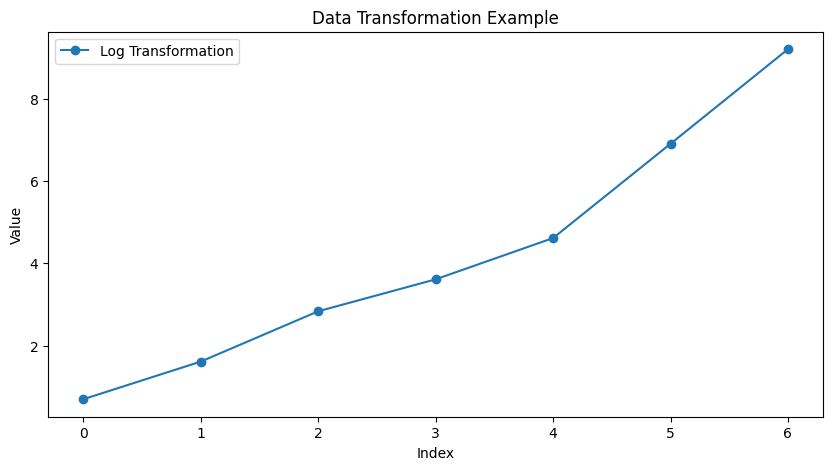

In [68]:
# 데이터 시각화
plt.figure(figsize=(10, 5))
#plt.plot(data['Original'], label='Original Data', marker='o')
plt.plot(data['Log Transformation'], label='Log Transformation', marker='o')
#plt.plot(data['Square Root Transformation'], label='Square Root Transformation', marker='o')
plt.legend()
plt.title('Data Transformation Example')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
# 데이터
data = pd.DataFrame({'Original' : [50, 80, 90, 100, 60]})
data

,Original
0,50
1,80
2,90
3,100
4,60


In [8]:
# 표준화
scaler_standard = StandardScaler()
data['Standardsized'] = scaler_standard.fit_transform(data[['Original']])
data

,Original,Standardsized
0,50,-1.401826
1,80,0.215666
2,90,0.754829
3,100,1.293993
4,60,-0.862662


In [10]:
# 정규화
scaler_minmax = MinMaxScaler()
data['Normalized'] = scaler_minmax.fit_transform(data[['Original']])
data

,Original,Standardsized,Normalized
0,50,-1.401826,0.0
1,80,0.215666,0.6
2,90,0.754829,0.8
3,100,1.293993,1.0
4,60,-0.862662,0.2


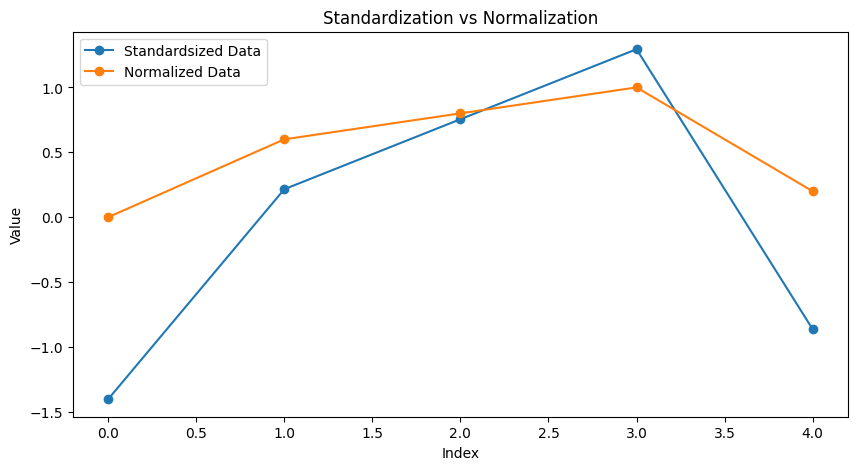

In [14]:
# 데이터 시각화
plt.figure(figsize=(10, 5))
#plt.plot(data['Original'], label='Original Data', marker='o')
plt.plot(data['Standardsized'], label='Standardsized Data', marker='o')
plt.plot(data['Normalized'], label='Normalized Data', marker='o')
plt.legend()
plt.title('Standardization vs Normalization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
 # 데이터 생성
data = pd.DataFrame({'Fruits': ['사과', '배', '포도', '사과', '포도']})
 # Step 1: 레이블 인코딩
label_encoder = LabelEncoder()
data['Label Encoding'] = label_encoder.fit_transform(data['Fruits'])
 # Step 2: 원-핫 인코딩 (OneHotEncoder사용, sparse_output=False로 개선)
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[['Label Encoding']])
 # Step 3: 결과를 DataFrame으로 변환
one_hot_columns = one_hot_encoder.get_feature_names_out()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Step 4: 원래 데이터에 추가
data = pd.concat([data, one_hot_df], axis=1)
 # 출력
print(data)

  Fruits  Label Encoding  Label Encoding_0  Label Encoding_1  Label Encoding_2
0     사과               1               0.0               1.0               0.0
1      배               0               1.0               0.0               0.0
2     포도               2               0.0               0.0               1.0
3     사과               1               0.0               1.0               0.0
4     포도               2               0.0               0.0               1.0
